# Setup of Project
## Imports

In [1]:
import csv
from pandas import DataFrame, read_csv
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import wrap
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
import traitlets
from IPython.display import display, HTML
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from mpl_toolkits.mplot3d import Axes3D

output_file_path = "output.csv"
input_file_path = "census2011.csv"

## Declarations
### Lists of Categories used in the Dataset
Taken from the accompanying documentation.

In [2]:
region_list =           ["E12000001", "E12000002", "E12000003", "E12000004", "E12000005", "E12000006", "E12000007", "E12000008", "E12000009", "W92000004"]
residence_list =        ['C', 'H']
family_list =           [1, 2, 3, 4, 5, 6, -9]
population_list =       [1, 2, 3]
sex_list =              [1, 2]
age_list =              [1, 2, 3, 4, 5, 6, 7, 8]
marital_list =          [1, 2, 3, 4, 5]
student_list =          [1, 2]
country_list =          [1, 2, -9]
health_list =           [1, 2, 3, 4, 5, -9]
ethnic_list =           [1, 2, 3, 4, 5, -9]
religion_list =         [1, 2, 3, 4, 5, 6, 7, 8, 9, -9]
economic_list =         [1, 2, 3, 4, 5, 6, 7, 8, 9, -9]
occupation_list =       [1, 2, 3, 4, 5, 6, 7, 8, 9, -9]
industry_list =         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -9]
hours_list =            [1, 2, 3, 4, -9]
socialGrade_list =      [1, 2, 3, 4, -9]

### Lists of categories human readable
Taken from the accompanying documentation.

In [3]:
region_list_readable =          ["North East", "North West", "Yorkshire and the Humber", "East Midlands", "West Midlands", "East of England", "London", "South East", "South West", "Wales"]
residence_list_readable =       ['Resident in a communal establishment', 'Not resident in a communal establishment']
family_list_readable =          ["Not in a family", "Married/same-sex civil partnership couple family", "Cohabiting couple family", "Lone parent family (male head)", "Lone parent family (female head)", "Other related family", "No code required"]
population_list_readable =      ["Usual resident", "Student living away from home during term-time", "Short-term resident"]
sex_list_readable =             ["Male", "Female"]
age_list_readable =             ["0 - 15", "16 - 24", "25 - 34", "35 - 44", "45 - 54", "55 - 64", "65 - 74", "75+"]
marital_list_readable =         ["Single", "Married or in registered same-sex civil partnership", "Separated but still legally married/still legally in a same-sex civil partnership", "Divorced or formerly in a same-sex civil partnership which is now legally dissolved", "Widowed or surviving partner from a same-sex civil partnership"]
student_list_readable =         ["Yes", "No"]
country_list_readable =         ["UK", "Non UK", "No code required"]
health_list_readable =          ["Very good health", "Good health", "Fair health", "Bad health", "Very bad health", "No code required"]
ethnic_list_readable =          ["White", "Mixed", "Asian and Asian British", "Black or Black British", "Chinese or other ethnic group", "No code required"]
religion_list_readable =        ["No religion", "Christian", "BuddhistEconomically", "Hindu", "Jewish", "Muslim", "Sikh", "Other religion", "Not stated", "No code required"]
economic_list_readable =        ["Economically active: Employee", "Economically active: Self-employed", "Economically active: Unemployed", "Economically active: Full-time student", "Economically inactive: Retired", "Economically inactive: Student", "Economically inactive: Looking after home or family", "Economically inactive: Long-term sick or disabled", "Economically inactive: Other", "No code required"]
occupation_list_readable =      ["Managers, Directors and Senior Officials", "Professional Occupations", "Associate Professional and Technical Occupations", "Administrative and Secretarial Occupations", "Skilled Trades Occupations", "Caring, Leisure and Other Service Occupations", "Sales and Customer Service Occupations", "Process, Plan and Machine Operatives", "Elementary Occupations", "No code required"]
industry_list_readable =        ["Agriculture, forestry and fishing", "Mining and quarrying; Manufacturing", "Construction", "Wholesale and retail trade; Repair of motor vehicles and motorycycles", "Accommodation and food service activities", "Transport and storage; Information and communication", "Financial and insurance activities; Intermediation", "Real estate activities; Professional, scientific and technical activities; Administrative and support service activities", "Public administration and defence; compulsory social security", "Education", "Human health and social work activities", "Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies", "No code required"]
hours_list_readable =           ["Part-time: 15 or less hours", "Part-time 16 - 20 hours", "Full-time: 31 - 48 hours", "Full-time: 49+ hours", "No code required"]
socialGrade_list_readable =     ["AB", "C1", "C2", "DE", "No code required"]

### Headers/Variable Names used in the Dataset
These form the header of the input file and are used to search and analyse the data using pandas.

In [4]:
personId = 'Person ID'
region = 'Region'
residence = 'Residence Type'
family = 'Family Composition'
population = 'Population Base'
sex = 'Sex'
age = 'Age'
marital = 'Marital Status'
student = 'Student'
country = 'Country of Birth'
health = 'Health'
ethnic = 'Ethnic Group'
religion = 'Religion'
economic = 'Economic Activity'
occupation = 'Occupation'
industry = 'Industry'
hours = 'Hours worked per week'
socialGrade = 'Approximated Social Grade'

### Lists of Headers
Used for easier iteration through headers/variable names.

In [5]:
# Lists containing all the above for easy iterations.
header_list = [region, residence, family, population, sex, age, marital, student,
                country, health, ethnic, religion, economic, occupation, industry,
                hours, socialGrade]

variable_list = [region_list, residence_list, family_list, population_list, sex_list, age_list,
                marital_list, student_list, country_list, health_list,
                ethnic_list, religion_list, economic_list, occupation_list,
                industry_list, hours_list, socialGrade_list]

variable_list_readable = [region_list_readable, residence_list_readable,
                family_list_readable, population_list_readable, sex_list_readable,
                age_list_readable, marital_list_readable, student_list_readable,
                country_list_readable, health_list_readable,ethnic_list_readable,
                religion_list_readable, economic_list_readable, occupation_list_readable,
                industry_list_readable, hours_list_readable, socialGrade_list_readable]

## Reading the Input File using Pandas

In [6]:
dataSet = pd.read_csv(input_file_path, header=0)

# Refining the Dataset
Function checks that the dataset matches the specifications described in the accompanying documentation. In case of any inconsistencies found, a new file with refined data is produced and returned to be used in the
subsequent analysis.

In [7]:
def refine_dataset(dataSet):
    """
        Refines the dataset as required by the specification.

        :param DataFrame dataSet: The DataFrame to refine
        :return: refined dataSet
        :rtype: DataFrame
    """
    
    newDS = dataSet.copy(deep=True)
    
    # Drop rows with invalid number of variables
    newDS.dropna(how='any')

    # Drop all duplicate personal IDs
    newDS.drop_duplicates(keep='first', inplace=True)          # Drop identical records.
    newDS.drop_duplicates(personId, keep=False, inplace=True)  # Drop records that have duplicate IDs.

    # Drop all Columns with headers not included in the header list
    for i in newDS.ix[:, newDS.columns != personId]:
        try:
            headerIndex = header_list.index(i)
            currentList = variable_list[headerIndex]
            newDS = newDS[newDS[i].isin(currentList)]
        except ValueError:  # When column i is not recognized.
            newDS.drop(i, axis=1, inplace=True)
            print("Column ignored:"+i)

    # Write updated dataset to file if changed.
    if(not dataSet.equals(newDS)):
        newDS.to_csv(output_file_path);

    return newDS

dataSet = refine_dataset(dataSet)

# Descriptive Analysis
## Replace all Categories with their human readable equivalent
Function creates a new DataFrame with all catagory codes replaced with their human readable equivalent. This new dataset is used for plotting as labels and descriptions will be clearer and more meaningful.

In [8]:
def readable_data(dataSet):
    """
        Takes dataSet and given two lists of data codes and equivalent readable
        strings where a data code's index matches the readable index will
        return a DataFrame where all codes have been replaced with their human
        readable equivalent

        :param DataFrame dataSet: The DataFrame to be made readable
        :return: readable equivalent of given DataFrame
        :rtype: DataFrame
    """
    # Uses a new copy of the dataset
    readableDataSet = dataSet.copy()

    variables_contained = []  # Stores the variables that the dataset contains.
    # Looping all the headers except the person id
    for i in readableDataSet.ix[:, dataSet.columns != personId]:
        variables_contained.append(i)
        headerIndex = header_list.index(i)
        currentList = variable_list[headerIndex]
        currentReadableList = variable_list_readable[headerIndex]
        readableDataSet[i].replace(currentList, currentReadableList, inplace = True)
        
    for var in header_list:
        if var not in variables_contained:
            print("Could not find \'" + var + "\' in input set.")
            
    return readableDataSet

readableDataSet = readable_data(dataSet)
#readableDataSet

## Print Variable Data Type
Determines and prints the type of a given variable. Types recognized are 'number', 'range of numbers', or 'binary'. Anything else is considered 'keywords'.

In [9]:
def print_data_type(header_name):
    """
        Determines and prints the type of a given variable.
        Types recognized are 
            'number'            : eg. -9 
            'range of numbers'  : eg. "0-15"
            'boolean'           : eg. "male"/"female"
            'string'            : eg. "E12000001"
        
        :param String header_name: The name of the variable in the list of headers.
    """
    readable_list = variable_list_readable[header_list.index(header_name)]
    
    isNumbers = True
    for i in readable_list:
        try:
            float(i)
        except:
            isNumbers = False
            
    if isNumbers:
        print("Data type: Number")
        return
            
    isRanges = True
    for i in range(len(readable_list)-2):
        if is_range(readable_list[i]) == False:
            isRanges = False
            break
        
    if isRanges:  # Last element can be [x-y] or [x+]
        s = readable_list[len(readable_list)-1]
        if is_range(s) == False:
            spl = s.split('+')
            if len(spl) != 2:
                isRanges = False
            else:
                if len(spl[1].strip()) != 0:  # The right of the plus should be empty.
                    isRanges = False
                else:
                    try:
                        float(spl[0])
                    except:
                        isRanges = False
                
    if isRanges:
        print("Data type: Range of Numbers.")
        return
        
    if len(readable_list) == 2:
        print("Data type: Boolean.")
        return
    
    print("Data type: String.")
    
def is_range(string_to_check):
    spl = string_to_check.split('-')
    if len(spl) != 2:
        return False
    else:
        try:
            float(spl[0])
            float(spl[1])
            return True
        except:
            return False

## Print Descriptive Analysis
From the specification:

Function performs a descriptive analysis of the dataset that
 * *determines the total number of records in the dataset*
 * *determines the type of each variable in the dataset*
 * *for each variable except “Person ID”, finds all values that it takes, and the number of occurrences for each value*

In [10]:
def descriptive_analysis(dataSet):
    """
        Prints the number of records in a dataSet
        the type of each varaible
        and the occurrences of each unique value
        
        :param DataFrame dataSet: The DataFrame to print stats for
    """
    
    print("\nNumber of records: " + str(len(dataSet)) + "\n")
    
    # Removes the coloumn 'person id' from dataset
    droppedSet = dataSet.drop(personId, axis=1)
    for headerName in droppedSet:
        # Gets group for current header
        group = droppedSet.groupby(headerName)

        # Print number of occurrences of each variable
        print(group.size())
        print_data_type(headerName)
        print("\n")

descriptive_analysis(readableDataSet)


Number of records: 569739

Region
East Midlands               45782
East of England             59411
London                      83582
North East                  26349
North West                  71436
South East                  88083
South West                  53774
Wales                       30976
West Midlands               56875
Yorkshire and the Humber    53471
dtype: int64
Data type: String.


Residence Type
Not resident in a communal establishment    559085
Resident in a communal establishment         10654
dtype: int64
Data type: Boolean.


Family Composition
Cohabiting couple family                             72641
Lone parent family (female head)                     64519
Lone parent family (male head)                        9848
Married/same-sex civil partnership couple family    300960
No code required                                     18851
Not in a family                                      96690
Other related family                                  6230
dtype: 

# Plots
Relates to **basic requirement 3** and **medium extension 2** as ipywidgets are used to control plot properties.

## General Plotting Function
This function is uses matplotlib and pandas to plot any data, headers and filters given. Plots the number of entries in the **dataSet** for a given **header** in a matplotlib plot of type **plt_type** using the given **axis**. The **title** provided is used also to construct the file-name when saving the plot. All the filters given in ***args** are applied using the pandas *isin()* function

In [28]:
# ensures plot will be shown in the jupyter notebook
%matplotlib notebook 

def plot_distribution_by_header(dataSet, header, plt_type, title, axis, *args):
    """
        Takes dataSet and then plots the distribution of given header

        :param DataFrame dataSet: The DataFrame to be plotted
        :param String header:     The header to plot
        :param String plt_type:   The type of plot (eg. "pie", "bar", etc)
        :param String title:      The plot title
        :param Axis axis:         The matplotlib axis to use
        :param *args              - each arg should be a touple of (filter_name, [filter_selection])
    """
    hd = str(header)
    pt = str(plt_type)
    tt = '\n'.join(wrap(str(title), 100))   # wrap long titles
    
    # filter dataset with filters provided in args
    for arg in args:
        dataSet = (dataSet[dataSet[arg[0]].isin(arg[1])])    
    
    # plot dataset and do per plot-type formatting
    if(pt == "pie"):
        dataSet[hd].value_counts().plot(ax=axis, kind=pt, autopct='%1.0f%%', pctdistance=0.8)
                                            # plots with % labels on pie chart slices
        axis.axis('equal')                  # Equal aspect ratio ensures that pie is drawn as a circle.
        axis.axis('off')                    # switches axis labels off
    if(pt == "bar") :
        dataSet[hd].value_counts().plot(ax=axis, kind=pt)
        axis.axis('auto')                   # resets axis labels back to auto
        axis.axis('on')
        axis.set_xlabel(hd)
        axis.set_ylabel("Number of Records")
    if(pt == "hist"):
        n, bins, patches = plt.hist(dataSet[hd].value_counts(), 50, normed=1, facecolor='green', alpha=0.75)
    
    # adding padding beneath the plot title
    plt.title(tt, y=1.06)
    
    # wrapping of long axis labels
    oldXLabels = [ x.get_text() for x in axis.get_xticklabels() ]
    xLabels = [ '\n'.join(wrap(l, 30)) for l in oldXLabels ]
    axis.set_xticklabels(xLabels)
    
    #plt.tight_layout()
    
    # saving figure to file - all spaces replaced with '_'
    plt.savefig('Visualisations/' + title.replace(" ", "_") + '.png', bbox_inches='tight')
    
    # show plot in notebook
    plt.show()

## Bar Chart for the Number of Records for each Region
This bar chart uses the function *plot_distribution_by_header()* and matplotlib to plot the number of records per region using the human-readable dataset. The resulting figure is also saved in the 'Visualisations' folder.

<IPython.core.display.Javascript object>


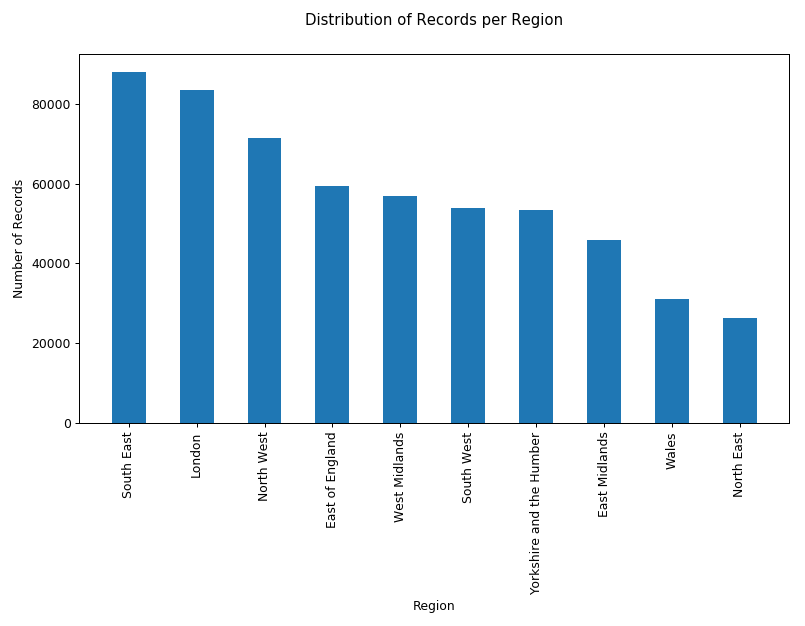

c:\users\johannes\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [12]:
fig, axis = plt.subplots(figsize=(9, 7))
plot_distribution_by_header(readableDataSet, region, 'bar', "Distribution of Records per Region", axis)

## Bar Chart for the Number of Records for each Occupation
Again, this graph uses the function *plot_distribution_by_header()* and matplotlib to plot the distribution of records per occupation. 

<IPython.core.display.Javascript object>


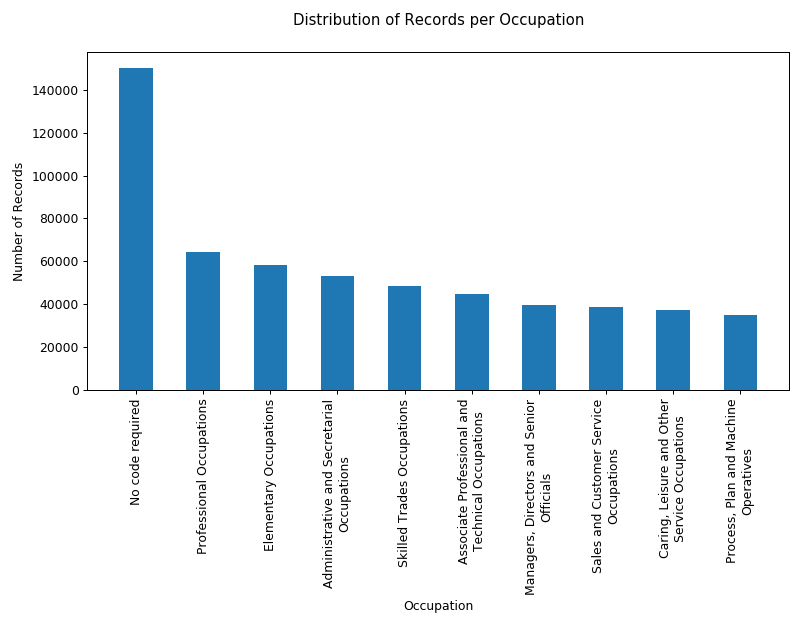

c:\users\johannes\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [13]:
fig, axis = plt.subplots(figsize=(9, 7))
plot_distribution_by_header(readableDataSet, occupation, 'bar', "Distribution of Records per Occupation", axis)

## Pie Chart for the Distribution of the Sample by Age

<IPython.core.display.Javascript object>


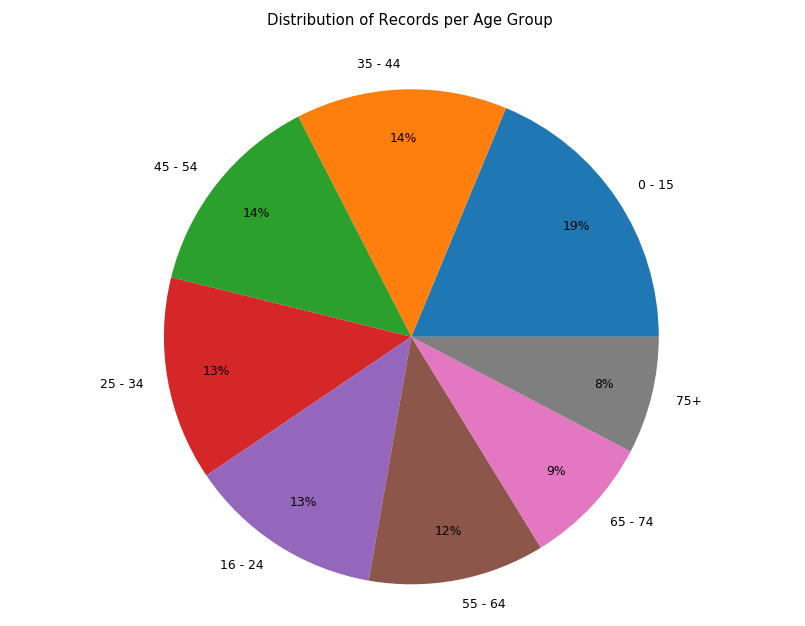

c:\users\johannes\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [14]:
fig, axis = plt.subplots(figsize=(9, 7))
plot_distribution_by_header(readableDataSet, age, 'pie', "Distribution of Records per Age Group", axis)

## Pie Chart for the Distribution of the Sample by the Economic Activity

<IPython.core.display.Javascript object>


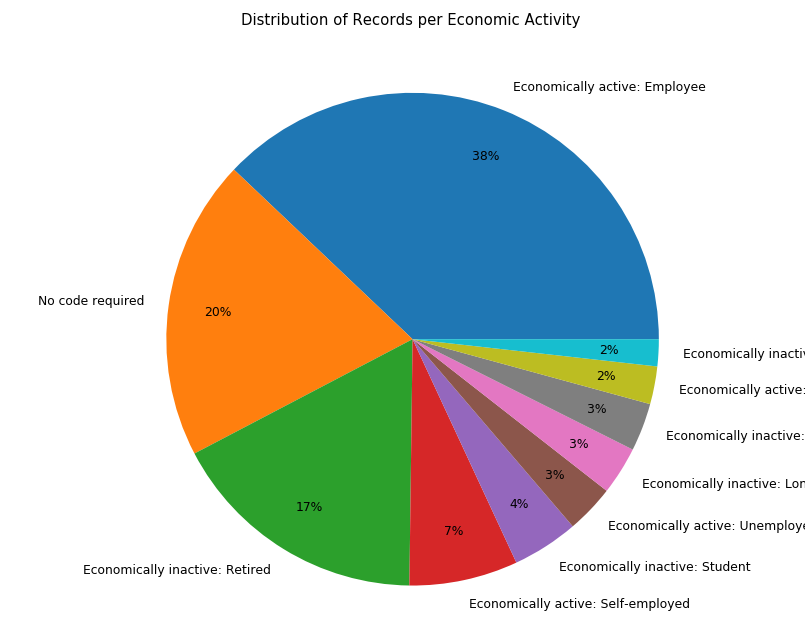

c:\users\johannes\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [15]:
fig, axis = plt.subplots(figsize=(9, 7))
plot_distribution_by_header(readableDataSet, economic, 'pie', "Distribution of Records per Economic Activity", axis)

## Interactive Ploting
Relates to Extensions **Easy 2** and **Medium 2** as well as our own **custom extension**  

This cell allows the user to create their own plots using ipywidget controls. The general plotting function *plot_distribution_by_header()* is used.  
Ipywidgets:
- all widgets are enclosed in HBox or VBox for consistent formatting and grouping
- to make the 'update' button always the last widget in the controls, it gets deleted and a new button added everytime a filter is added or removed
- filter widgets are added to the lists *filter_boxes*, *filter_selector_widgets*, *value_selector_widgets* to allow later deletion of widgets as well as easy looping to use their values
- Ipywidgets events are used to dynamically update the filter-values list when selecting a header to filter
- try-catch clauses are used whenever closing or deleting widgets as this facilitates the cases when lists are empty (no filters added yet) 

The *makeTitle()* function creates a plot title from the header and filter arguments. If a filter in the arguments has all its values selected, then it is ignored in the title, as this is the same as ignoring it when plotting. 

<IPython.core.display.Javascript object>


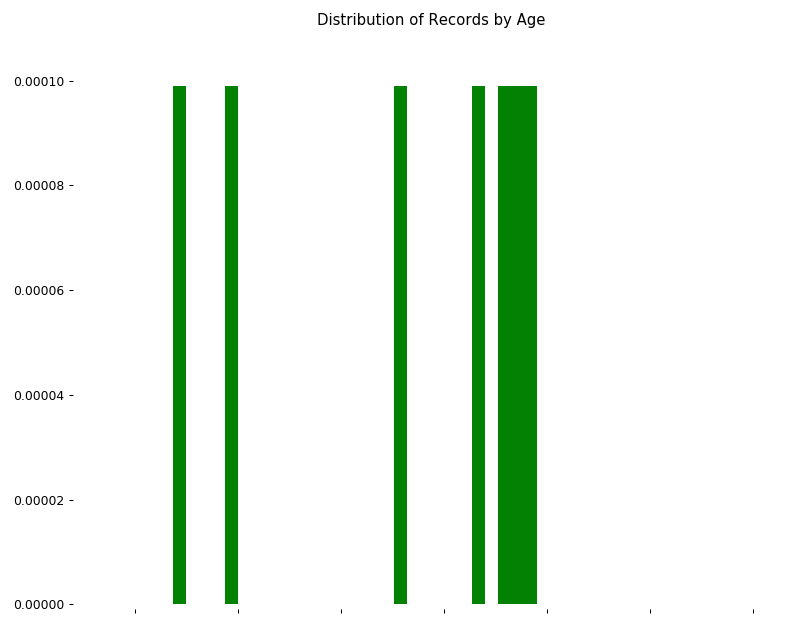

c:\users\johannes\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


ValueError: Image size of 1154x5229599 pixels is too large. It must be less than 2^16 in each direction.

In [29]:
fig, axis = plt.subplots(figsize=(9, 7))

# lists storing filter widgets
filter_boxes = []
filter_selector_widgets = []
value_selector_widgets = []

def makeTitle(header, *args):
    """
        Function makes a human readable title from the header and filters provided. 
        Format:
            "Distribution of Records by <header> (for the <header> [<value>, ...] (and 
                the <header> [<value>, ...]), ...)
    """
    ret = "Distribution of Records by " + header
    a = 0
    for arg in args:
        i = header_list.index(arg[0])
        allValues = variable_list_readable[i]
        if(len(arg[1]) > 0 and len(arg[1]) < len(allValues)):
            if(a>0):
                ret += " and"
            else:
                ret += " for"
        if((len(arg[1]) > 1) and (len(arg[1]) < len(allValues))):
            ret += " the " + arg[0] + "[s] "
            i = 0
            for item in arg[1]:
                if(i>0):
                    ret+= ","
                ret += " '" + item + "'"
                i += 1
        elif(len(arg[1]) == 1):
            ret += " the " + arg[0] + " '" + arg[1][0] + "'"
        a += 1
    return ret

def update(b):
    """
        Called when "Update" is clicked. Clears previous and draws new plot. 
        Calls plot_distribution_by_header() with user selection.
    """
    axis.clear()
    filters = []
    for (f,s) in zip(filter_selector_widgets, value_selector_widgets):
        filters.append((f.value, s.value))
    plt_title = makeTitle(headerSelector.value, *filters);
    plot_distribution_by_header(readableDataSet, headerSelector.value, pltSelector.value, plt_title, axis, *filters)

def removeFilter(b):
    """
        Called when "Remove Filter" is clicked. Tries to remove the last 
        set of filters in the lists.
    """
    try:
        filter_selector_widgets[-1].close()
        del filter_selector_widgets[-1]
        value_selector_widgets[-1].close()
        del value_selector_widgets[-1]
        filter_boxes[-1].close()
        del filter_boxes[-1]
    except:
        pass
    
def addFilter(b):
    """
        Called when "Add Filter" is clicked. Adds 2 new Selectors to the Controls.
    """
    
    # selector widget to chose header
    filter_selector_widget = widgets.Select(
        options=header_list,
        value=header_list[0],
        description='Header to filter:')
    
    # multi-selector widget to chose values
    value_selector_widget = widgets.SelectMultiple(
        options=variable_list_readable[0],
        value=[variable_list_readable[0][0]],
        description='Filter:')
    
    # handler function which updates the value_selector_widget
    def handle_chose(sender):
        """
            Called when a value in filter_selector_widget is clicked. Updates the 
            value_selector_widget.
        """
        i = header_list.index(filter_selector_widget.value)
        value_selector_widget.options=variable_list_readable[i]
        value_selector_widget.value=[variable_list_readable[i][0]]
    
    # register handler function
    filter_selector_widget.observe(handle_chose, names='value')
    
    # make vertival box for formatting
    filterControls = widgets.VBox([filter_selector_widget, value_selector_widget])
    
    # add widgets to list of all widgets
    filter_selector_widgets.append(filter_selector_widget)
    value_selector_widgets.append(value_selector_widget)
    filter_boxes.append(filterControls)

    # make new submit button and remove old ones
    global submit_new
    try:
        submit_new.close()
        submit.close()
        submitControl.close()
        submitControl_new.close()
    except:
        pass
    
    submit_new = widgets.Button(description="Update")
    submit_new.style.button_color = 'rosybrown'
    submit_new.on_click(f)
    submitControl_new = widgets.HBox([submit_new])
    display(filterControls, submitControl_new)

# control title
caption = widgets.Label(
    value='Interactive Plot Creator:',
    layout=Layout(width='160px'))

# plot type selector
pltSelector = widgets.Select(
    options=["pie", "bar", "hist"],
    value="pie",
    description='Plot Type:')

# header selector
headerSelector = widgets.Select(
    options=header_list,
    value=header_list[0],
    layout=Layout(color='#000000'),
    description='What to plot:')

pltControls = widgets.VBox([caption, pltSelector, headerSelector])

# 'add filter' button
addFilterButton = widgets.Button(description="Add Filter")
addFilterButton.style.button_color = 'forestgreen'
addFilterButton.on_click(addFilter)

# 'remove filter' button
removeFilterButton = widgets.Button(description="Remove Filter")
removeFilterButton.style.button_color = 'red'
removeFilterButton.on_click(removeFilter)
filterControls = widgets.HBox([addFilterButton, removeFilterButton])

# 'submit' button
submit = widgets.Button(description="Update")
submit.style.button_color = 'rosybrown'
submit.on_click(update)
submitControl = widgets.HBox([submit])

# display widgets
display(pltControls, filterControls, submitControl)

## Student Discrepancies
Relates to **Extension Easy 2** 

Prints whether there are any discrepancies between the student status given as a yes/no answer to the question “Student (Schoolchild or full-time student)” and answers on the question on “Economic activity”.

In [17]:
def print_student_discrepancies(dataSet):
    """
        Takes dataSet and prints difference between student numbers
        and student-based economic activity

        :param DataFrame dataSet: The DataFrame to be plotted
    """
    economicStudentDataSet = dataSet[(dataSet[economic] == economic_list_readable[3])
                      | (dataSet[economic] == economic_list_readable[5])]

    identifiedStudentDataSet = dataSet[dataSet[student] == student_list_readable[0]]
    
    sizeEconomic = len(identifiedStudentDataSet)
    sizeStudent = len(economicStudentDataSet)

    if(sizeEconomic > sizeStudent):
        print("More economically identified students - discrepancy of " + str(sizeEconomic - sizeStudent) + " records.")
    elif(sizeEconomic < sizeStudent):
        print("More student identified students - discrepancy of " + str(sizeStudent - sizeEconomic) + " records.")
    else:
        print("No discrepancy found")

print_student_discrepancies(readableDataSet)

More economically identified students - discrepancy of 87664 records.


# Using Pandas *groupby()*
Relates to **Extension Easy 1**
## Number of Records by Region and Industry

In [18]:
reg_ind = readableDataSet.groupby([region, industry])
reg_ind.size()  # Does not produce full table. Prints '...' to avoid writing too much.

Region                    Industry                                                                                                                                        
East Midlands             Accommodation and food service activities                                                                                                            1936
                          Agriculture, forestry and fishing                                                                                                                     429
                          Construction                                                                                                                                         2500
                          Education                                                                                                                                            3280
                          Financial and insurance activities; Intermediation                                 

## Number of Records by Occupation and Social grade

In [19]:
occ_soc = readableDataSet.groupby([occupation, socialGrade])
occ_soc.size()

Occupation                                        Approximated Social Grade
Administrative and Secretarial Occupations        AB                             3000
                                                  C1                            44922
                                                  C2                             2353
                                                  DE                             2252
                                                  No code required                727
Associate Professional and Technical Occupations  AB                             7050
                                                  C1                            35435
                                                  C2                              647
                                                  DE                              986
                                                  No code required                819
Caring, Leisure and Other Service Occupations     AB            

# 3D Plots
Relates to Extension **Medium 1**

In [20]:
def plot3d(table, list1, list2, outputfilename):
    """
        Produces a 3D Bar plot from the given table and saves it in a specified file.
        
        :param table list: a one diminsional list of values
            it's length must be the product of the lengths of the next two arguments
        :param list1 list: the values from this list will be put as ticks on the y-axis
        :param list2 list: the values from this list will be put as ticks on the x-axis
        :param outputfilename str: the path to the file where the produced figure should be saved
    """
    # Deep copy and sort lists alphabetically
    # because the tables provided by pandas are sorted this way.
    l1s = [x for x in list1]
    l1s.sort()
    l1 = len(l1s)
    l2s = [x for x in list2]
    l2s.sort()
    l2 = len(l2s)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(l1):  # Iterate the table in l1 chuncks of size l2.
        ax.bar(range(l2), table[(i*l2):(i*l2+l2)], zs=i, zdir='y')

    # Sets the number of ticks
    plt.locator_params(axis='x', nticks=l2)
    plt.locator_params(axis='y', nticks=l1)

    # Assign and align tick labels.
    ax.set_xticklabels(l2s, rotation=30, va='top', ha='right')
    ax.set_yticklabels(l1s, rotation=-15, va='top', ha='left')

    # Make the figure larger, so that all the labels fit.
    fig.tight_layout()#pad=-60)

    ax.set_zlabel("Number of records")
    # puts the Z labels on the left (switches two pairs of planes)
    # from http://stackoverflow.com/questions/25068666/label-manipulation-for-3d-plot-using-matplotlib
    tmp_planes = ax.zaxis._PLANES 
    ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                         tmp_planes[0], tmp_planes[1], 
                         tmp_planes[4], tmp_planes[5])

    fig.savefig(outputfilename, bbox_inches='tight')

<IPython.core.display.Javascript object>


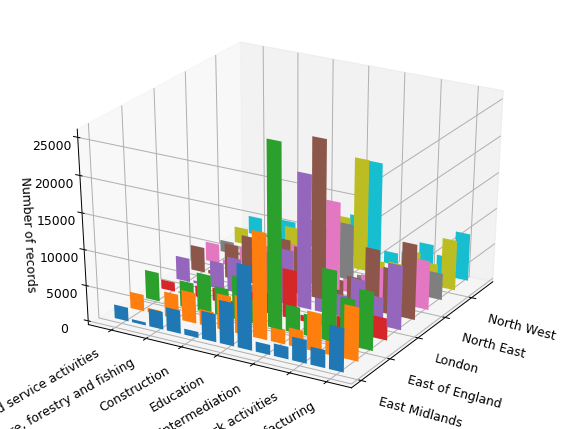

c:\users\johannes\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [21]:
plot3d(reg_ind.size(), region_list_readable, industry_list_readable,
       "Visualisations/region_industry_3d.png")

<IPython.core.display.Javascript object>


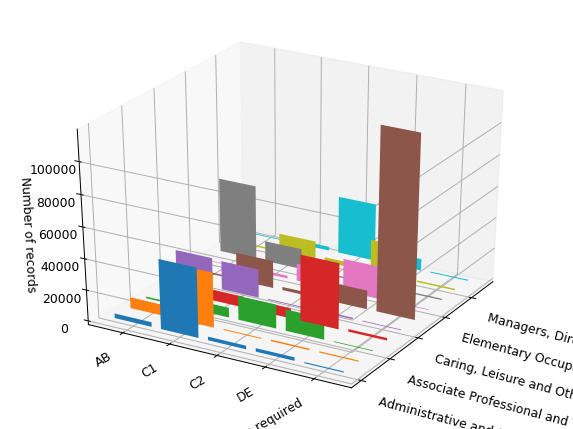

c:\users\johannes\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [22]:
plot3d(occ_soc.size(), occupation_list_readable, socialGrade_list_readable,
       "Visualisations/occupation_socialgrade_3d.png")